In [84]:
import pandas as pd
import numpy as np
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re
from collections import Counter, defaultdict


In [21]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
raw_html = raw_html.read()

In [26]:
corpus = [['The MAX Orange Line is a light rail service in Portland, Oregon, United States, operated by TriMet as part of the MAX Light Rail system. It connects Portland City Center to Portland State University (PSU), Southeast Portland, Milwaukie, and Oak Grove. The Orange Line starts near Portland Union Station heading southbound within downtown Portland along the Portland Transit Mall on 5th Avenue. From the transit mall, it continues along a 7.3-mile (11.7 km) segment, which runs through the South Waterfront, across the Willamette River into Southeast Portland, then south to Oak Grove, just outside Milwaukie proper in unincorporated Clackamas County. The Orange Line serves 17 stations from Union Station/Northwest 5th & Glisan to Southeast Park Avenue and runs for 201⁄2 hours daily with a minimum headway of 15 minutes during most of the day. The line carried an average of 3,480 daily weekday riders in September 2020.'],
         ['The Portland–Milwaukie Light Rail Project was the second and final phase of the South Corridor Transportation Project that in its first phase expanded light rail services to Interstate 205 (I-205) and the Portland Transit Mall. The Portland–Milwaukie extension, which followed years of failed light rail plans for Clackamas County, began construction work in mid-2011. As part of the project, TriMet built Tilikum Crossing over the Willamette River, the largest "car-free" bridge in the United States. The extension opened to Orange Line service on September 12, 2015.'],
         ['Within the Portland Transit Mall, the Orange Line operates as a southbound through service of the Yellow Line from Union Station/Northwest 5th & Glisan station, sharing the tracks on 5th Avenue with the Green Line. From PSU South/Southwest 6th and College station, the Orange Line operates through to the Yellow Line as a northbound service on 6th Avenue, terminating at Expo Center station in North Portland.'],
         ['The following year, the FHWA approved the addition of a busway component to the I-205 freeway, which was under construction at the time in Portland\'s east side.This bus corridor, which would be called the "I-205 busway", was a physically separate route running parallel to the freeway.']]

In [37]:
for i in range(len(corpus )):
    corpus[i] = list(map(lambda x: x.lower(), corpus[i]))

## Code for ngrams

In [16]:
def generate_ngrams(sentence, N=2):
    
    text = sentence.split(' ')
    ngrams = set()
    for i in range(len(text)-N):

        ngrams.add(' '.join(text[i:i+N]))
        
    return ngrams
        
        
    

In [18]:
sentence = "My name is Surbhi and I like chocolates"
generate_ngrams(sentence, N=4)

{'My name is Surbhi',
 'Surbhi and I like',
 'is Surbhi and I',
 'name is Surbhi and'}

### Statistical Features

let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –
Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”
TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)


IDF: (Total number of sentences (documents))/(Number of sentences (documents) containing the word)


TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:
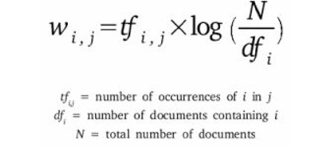

In [53]:
## Find the features of most frequent words
data = ""
for i, sentence in enumerate(corpus):
    data+=" "+sentence[0]


In [59]:
len(data.split(' '))

346

In [68]:
most_frequent  = Counter(data.split(' ')).most_common(100)

In [69]:
dictionary = [ pairs[0] for pairs in most_frequent]
"""
dictionary of the most frequent words

"""

### Convert idf which will be same for whole data

In [86]:
idf = {}
N = len(corpus)
for token in dictionary:
    num_docs = 0
    for i in range(N):
        if token in corpus[i][0].split(' '):
            num_docs+=1
            
    idf[token] = (np.log(N/(1+num_docs)))

## T.C  : O(num_tokens*num_documents*M)

## compute Term Frequency

In [88]:
sent_tf = {}

In [89]:
for token in dictionary:
    doc_freq = 0
    sent_tf_vector = []
    for sentence in corpus:
        for words in sentence[0].split(' '):
            if words == token:
                doc_freq+=1
        sent_tf_vector.append(doc_freq/len(sentence[0].split(' ')))
        
    sent_tf[token] = sent_tf_vector
    

### Now we compute tf-idf values

In [96]:
tf_idf = pd.DataFrame(columns=dictionary)

In [106]:
for i in range(len(corpus)):
    sentence_vector = {}
    for tokens in dictionary:
        #print(idf[tokens])
        sentence_vector[tokens] = sent_tf[tokens][i]*idf[tokens]
        
    tf_idf = tf_idf.append(sentence_vector, ignore_index=True)
        
        
        
    

In [107]:
tf_idf

,the,line,of,in,to,a,portland,orange,light,rail,...,proper,unincorporated,county.,serves,17,stations,park,201⁄2,hours,minimum
0,-0.015180,0.0,-0.006072,-0.004554,-0.004554,0.0,0.0,0.0,0.003914,0.003914,...,0.004715,0.004715,0.004715,0.004715,0.004715,0.004715,0.004715,0.004715,0.004715,0.004715
1,-0.051894,0.0,-0.018163,-0.015568,-0.012973,0.0,0.0,0.0,0.016726,0.016726,...,0.008060,0.008060,0.008060,0.008060,0.008060,0.008060,0.008060,0.008060,0.008060,0.008060
2,-0.091286,0.0,-0.027048,-0.023667,-0.020286,0.0,0.0,0.0,0.021794,0.021794,...,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502
3,-0.164932,0.0,-0.043659,-0.038808,-0.038808,0.0,0.0,0.0,0.031270,0.031270,...,0.015068,0.015068,0.015068,0.015068,0.015068,0.015068,0.015068,0.015068,0.015068,0.015068
